In [1]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data and model

x_test = pd.read_csv('../data/processed/x_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()

rf_baseline = joblib.load('../models/random_forest.pkl')
rf_tuned = joblib.load('../models/random_forest_tuned.pkl')
lr_model = joblib.load('../models/logistic_regression.pkl')

## Model evaluation

The tuned Random Forest model was evaluated on the test set. 

**Metrics:**
- **Accuracy:** 0.961  
- **Precision:** 0.95 (class 0), 0.97 (class 1)  
- **Recall:** 0.97 (class 0), 0.95 (class 1)  
- **F1-score:** 0.96 (both classes)

The classification report shows that the model performs well across both classes, with minimal bias toward any class. This confirms that hyperparameter tuning improved generalization over the baseline model.

In [3]:
# evaluate model

y_pred = rf_tuned.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9608572825555495
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17791
           1       0.97      0.95      0.96     19023

    accuracy                           0.96     36814
   macro avg       0.96      0.96      0.96     36814
weighted avg       0.96      0.96      0.96     36814



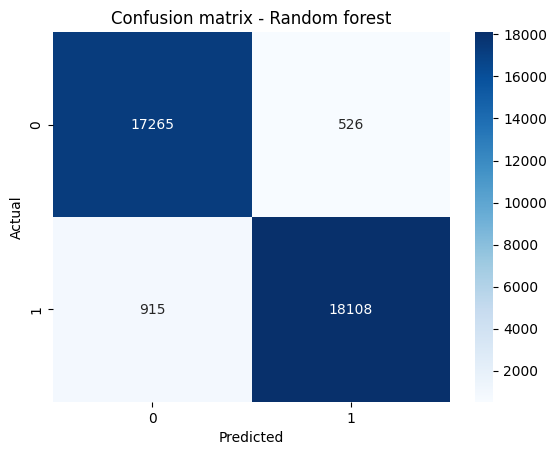

In [4]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix - Random forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Feature importance insights

The top features driving predictions are:

1. **tower_diff** – Difference in towers taken between Blue and Red; strongest predictor of match outcome.  
2. **dragon_diff** – Difference in dragons; also highly predictive.  
3. **baron_diff** – Baron control influences late-game win probability.  
4. **blue_first features** – Early objectives (first blood, first tower, first dragon, first baron) moderately impact prediction.

This suggests that **early game objective control** and **map advantage** strongly influence the probability of winning.

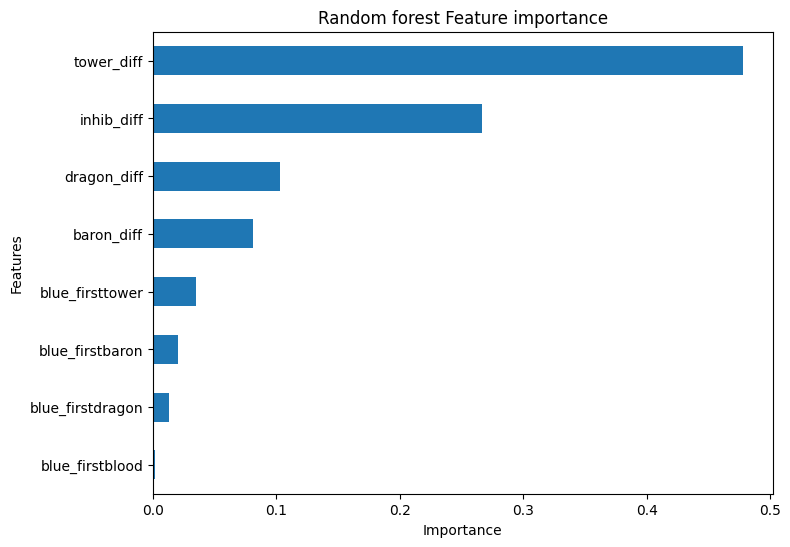

In [5]:
# visualize feature importance

feat_importances = pd.Series(rf_tuned.feature_importances_, index=x_test.columns)

feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Random forest Feature importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Model performance comparison

We compared three models on the test set:

- **Baseline Random Forest**  
- **Tuned Random Forest**  
- **Logistic Regression**

The tuned Random Forest achieved the highest accuracy (0.961), showing the benefit of hyperparameter optimization. Logistic Regression performs reasonably but fails to capture complex interactions between features.

_Though for this particular project, there's minimal differences in the accuracy of the 3 models as they're all very accurate._

In [6]:
# compare models 

rf_baseline_pred = rf_baseline.predict(x_test)
rf_tuned_pred = rf_tuned.predict(x_test)
lr_pred = lr_model.predict(x_test)

rf_baseline_acc = accuracy_score(y_test, rf_baseline_pred)
rf_tuned_acc = accuracy_score(y_test, rf_tuned_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print("Baseline RF:", rf_baseline_acc)
print("Tuned RF:", rf_tuned_acc)
print("Logistic Regression:", lr_acc)

Baseline RF: 0.9586841962296953
Tuned RF: 0.9608572825555495
Logistic Regression: 0.959118813494866


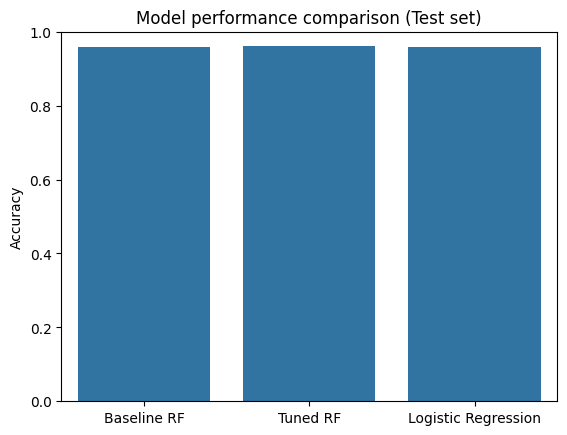

In [7]:
model_names = ['Baseline RF', 'Tuned RF', 'Logistic Regression']
accuracies = [rf_baseline_acc, rf_tuned_acc, lr_acc]

sns.barplot(x=model_names, y=accuracies)
plt.title("Model performance comparison (Test set)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [8]:
# Example 1 - Blue win

new_data = pd.DataFrame([{
    'tower_diff': 3,
    'dragon_diff': 2,
    'baron_diff': 1,
    'inhib_diff': 1,
    'blue_firstblood': 1,
    'blue_firsttower': 1,
    'blue_firstdragon': 1,
    'blue_firstbaron': 1
}])

prediction = rf_tuned.predict(new_data)
probability = rf_tuned.predict_proba(new_data)

print("Predicted class:", prediction[0])
print("Win probability for Blue:", probability[0][1])

Predicted class: 1
Win probability for Blue: 0.9749153323472133


In [9]:
# Example 2 - Blue loss 

new_data = pd.DataFrame([{
    'tower_diff': -2,
    'dragon_diff': -1,
    'baron_diff': 0,
    'inhib_diff': -1,
    'blue_firstblood': 0,
    'blue_firsttower': 0,
    'blue_firstdragon': 0,
    'blue_firstbaron': 0
}])

prediction = rf_tuned.predict(new_data)
probability = rf_tuned.predict_proba(new_data)

print("Predicted class:", prediction[0])
print("Win probability for Blue:", probability[0][1])

Predicted class: 0
Win probability for Blue: 0.08654577877906372


## Project Insights

Key takeaways:

- Controlling **towers and dragons early** strongly correlates with winning.  
- Securing **first blood and first major objectives** increases win probability.  
- This model can help **teams or analysts identify which objectives to prioritize** in order to maximize win chance.